In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [2]:
Categories=['yes','no'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir=r'C:\Users\Reshmah\Desktop\vps\parking\train'
#path which con tains all the categories of images 
for i in Categories: 
 print(f'loading... category : {i}') 
 path=os.path.join(datadir,i) 
 for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
 print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : yes
loaded category:yes successfully
loading... category : no
loaded category:no successfully


In [3]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape

(174, 67501)

In [4]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]

In [5]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10, random_state=10, stratify=y) 


In [6]:
param_grid={'C':[0.1,1,10,100], 'gamma':[0.0001,0.001,0.1,1], 'kernel':['rbf','poly']} 
svc=svm.SVC(probability=True) 
model=GridSearchCV(svc,param_grid)


In [7]:

model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [8]:
y_pred = model.predict(x_test) 
accuracy = accuracy_score(y_pred, y_test) 
print(f"The model is {accuracy*100}% accurate")

The model is 94.44444444444444% accurate


In [17]:
print(classification_report(y_test, y_pred, target_names=['yes', 'no']))


              precision    recall  f1-score   support

         yes       1.00      0.83      0.91         6
          no       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



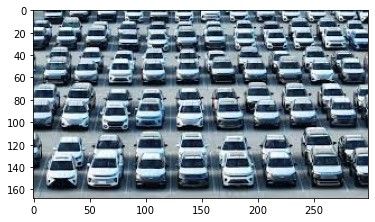

yes = 3.9590880764104295%
no = 96.04091192358959%
The predicted image is : no


In [14]:
path=r'C:\Users\Reshmah\Desktop\testing folder\train\no\images (6).jpeg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])
